In [411]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('NICS_Firearm_Checks.csv', index_col='State/Territory')

In [412]:
df.shape

(1155, 14)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, Alabama to Wyoming
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1155 non-null   int64 
 1   Jan     1155 non-null   object
 2   Feb     1155 non-null   object
 3   Mar     1155 non-null   object
 4   Apr     1155 non-null   object
 5   May     1155 non-null   object
 6   Jun     1155 non-null   object
 7   Jul     1155 non-null   object
 8   Aug     1155 non-null   object
 9   Sep     1155 non-null   object
 10  Oct     1155 non-null   object
 11  Nov     1155 non-null   object
 12  Dec     1155 non-null   object
 13  Totals  1155 non-null   object
dtypes: int64(1), object(13)
memory usage: 72.2+ KB


In [414]:
df.fillna(0, inplace=True)

In [415]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
State/Territory,,,,,,,,,,,,,,
Alabama,2020,"79,332","75,336","92,652","70,748","80,519","139,873","107,490","85,347","80,478","80,934","91,839","100,927","984,548"
Alaska,2020,"4,706","5,466","9,939","8,560","8,883","9,060","10,108","9,363","7,897","7,564","8,510","8,896","90,056"
Arizona,2020,"33,224","37,100","82,771","59,986","51,098","74,055","60,330","54,095","51,287","52,521","54,444","54,547","610,911"
Arkansas,2020,"19,126","21,445","31,651","30,575","25,917","30,792","27,647","23,980","24,043","27,177","30,770","31,618","293,123"
California,2020,"96,567","95,430","164,497","122,999","110,823","158,349","149,685","145,797","139,313","151,359","130,793","135,442","1,465,612"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,2000,"13,636","15,794","17,908","13,361","11,352","11,129","11,886","13,970","16,397","17,457","21,270","24,348","188,508"
Washington,2000,"9,171","10,534","11,763","9,711","8,880","8,910","9,156","11,248","13,685","14,792","11,741","14,664","134,255"
West Virginia,2000,"8,589","11,546","10,855","9,255","7,143","7,397","7,743","9,060","12,058","13,650","16,591","14,371","128,258"


In [416]:
df = df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','')))

In [417]:
df=df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, Alabama to Wyoming
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    1155 non-null   int32
 1   Jan     1155 non-null   int32
 2   Feb     1155 non-null   int32
 3   Mar     1155 non-null   int32
 4   Apr     1155 non-null   int32
 5   May     1155 non-null   int32
 6   Jun     1155 non-null   int32
 7   Jul     1155 non-null   int32
 8   Aug     1155 non-null   int32
 9   Sep     1155 non-null   int32
 10  Oct     1155 non-null   int32
 11  Nov     1155 non-null   int32
 12  Dec     1155 non-null   int32
 13  Totals  1155 non-null   int32
dtypes: int32(14)
memory usage: 67.7+ KB


In [418]:
year_grp = df.groupby(['Year'])

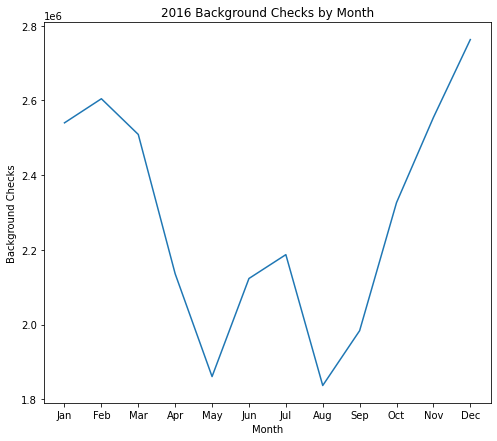

In [419]:
df_2016 = year_grp.get_group(2016)
month_sum=[]
for month in df.columns[1:13]:
    month_sum.append(df_2016[month].sum())
df_2016.columns[1:13]

fig, ax = plt.subplots(figsize=(8,7))
plt.xlabel('Month')
plt.ylabel('Background Checks')
plt.title('2016 Background Checks by Month')
ax.plot(df_2016.columns[1:13], month_sum)
plt.show()

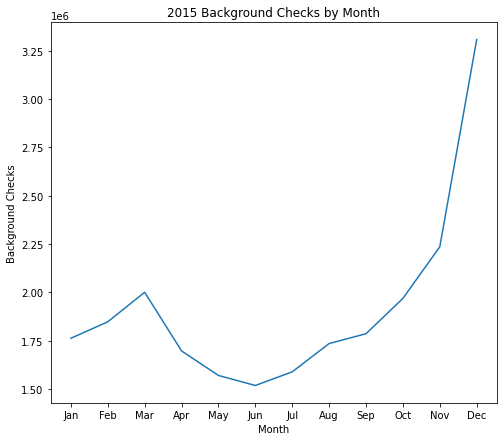

In [420]:
df_2015 = year_grp.get_group(2015)
month_sum=[]
for month in df.columns[1:13]:
    month_sum.append(df_2015[month].sum())
df_2015.columns[1:13]

fig, ax = plt.subplots(figsize=(8,7))
plt.xlabel('Month')
plt.ylabel('Background Checks')
plt.title('2015 Background Checks by Month')
ax.plot(df_2015.columns[1:13], month_sum)
plt.show()

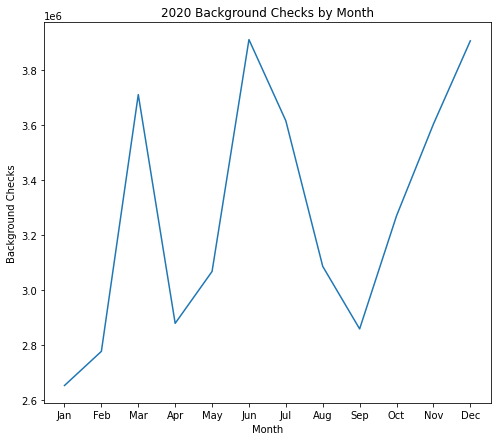

In [421]:
df_2020 = year_grp.get_group(2020)
month_sum=[]
for month in df.columns[1:13]:
    month_sum.append(df_2020[month].sum())
df_2020.columns[1:13]

fig, ax = plt.subplots(figsize=(8,7))
plt.xlabel('Month')
plt.ylabel('Background Checks')
plt.title('2020 Background Checks by Month')
ax.plot(df_2020.columns[1:13], month_sum)
plt.show()

In [422]:
df_yr = df.groupby('Year').sum().drop(columns='Totals')
df_yr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2000,628853,696313,725733,606636,526521,540036,533898,676394,774146,836363,888547,993656
2001,633916,666352,720477,583762,532437,534369,532306,704010,857828,1023080,976210,1055298
2002,655987,687011,707897,619669,557459,507222,530171,688810,718270,843113,881541,969919
2003,646882,703956,730189,615058,560886,523780,525032,677315,731305,848369,836392,1003080
2004,685638,715879,729554,629279,529776,537942,552985,658919,732988,857807,883939,1065185
2005,678733,735103,757824,647423,546986,548584,555679,679473,786211,847860,921798,1161381
2006,767936,815478,837280,693232,622547,613583,629866,830477,917184,969092,1043598,1252784
2007,893575,913547,974093,838642,801509,791992,756584,916097,943662,1023899,1079062,1229610
2008,941043,1019972,1039597,938745,885246,818485,889634,955685,971613,1182156,1528341,1522468


Text(0.5, 1.0, 'Firearm Background Checks - 2000 to 2020')

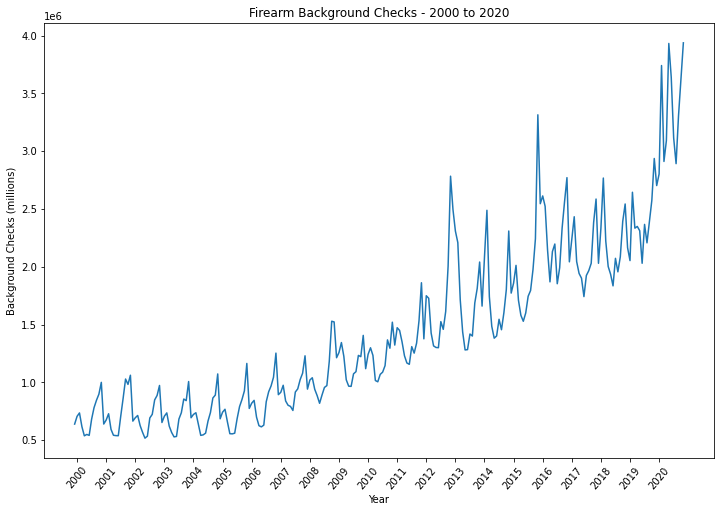

In [423]:
df_new = pd.read_csv('NICS_Firearm_Checks_Month_Year.csv', index_col='Year')
df_new.dropna(inplace=True)
df_new = df_new.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','')))
df_new.drop(columns='Totals', inplace=True)
df_new_list = df_new.values.tolist()
sums = [elem for items in df_new_list for elem in items]

labels = []
for i in df_new.index:
    for j in df_new.columns:
        labels.append(j+"-"+str(int(i)))

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(labels, sums)
labs = [i for i in df_new.index.astype(int)]
ax.set_xticks([i*12-11 for i in range(1,22)])
ax.set_xticklabels([i for i in df_new.index.astype(int)], rotation = 50)
plt.xlabel('Year')
plt.ylabel('Background Checks (millions)')
plt.title('Firearm Background Checks - 2000 to 2020')

In [424]:
df_2016.sort_values(by='Totals', ascending=False)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
State/Territory,,,,,,,,,,,,,,
Kentucky,2016,302383,266913,321318,306214,321666,360293,363085,29746,298753,378973,330444,397059,3676847
California,2016,220912,214844,201041,171256,166035,173846,190218,176770,159077,180968,224039,298161,2377167
Illinois,2016,189400,169908,175762,154306,119574,164500,168227,185912,127535,169348,161604,137994,1924070
Texas,2016,164088,192417,152465,126292,104134,120263,127207,124608,126694,144467,157519,181572,1721726
Indiana,2016,230892,221556,151821,126579,119897,94326,88340,79202,63820,72085,92535,95672,1436725
Florida,2016,125935,132010,119207,104114,94732,125567,125208,114446,102843,111657,134638,144983,1435340
Pennsylvania,2016,102170,104116,105145,88140,70244,80806,86137,86652,86424,103095,118378,111913,1143220
Ohio,2016,76218,90222,85267,71881,58406,60366,63148,62418,58828,71864,88928,88178,875724
Tennessee,2016,62789,68503,51955,57837,44044,56218,57653,60971,48546,56652,74722,74884,714774


In [425]:
#Yearly Sums
df1 = year_grp['Totals'].sum()
df1 = pd.DataFrame(df1)
df1 = df1.rename(columns = {'Totals': 'Yearly Sum'})
df1

,Yearly Sum
Year,
2000,8427096
2001,8820045
2002,8367069
2003,8402244
2004,8579891
2005,8867055
2006,9993057
2007,11162272
2008,12692985


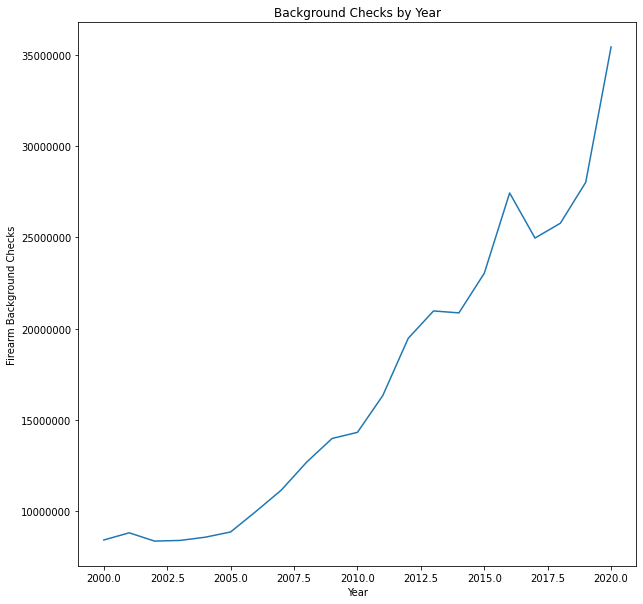

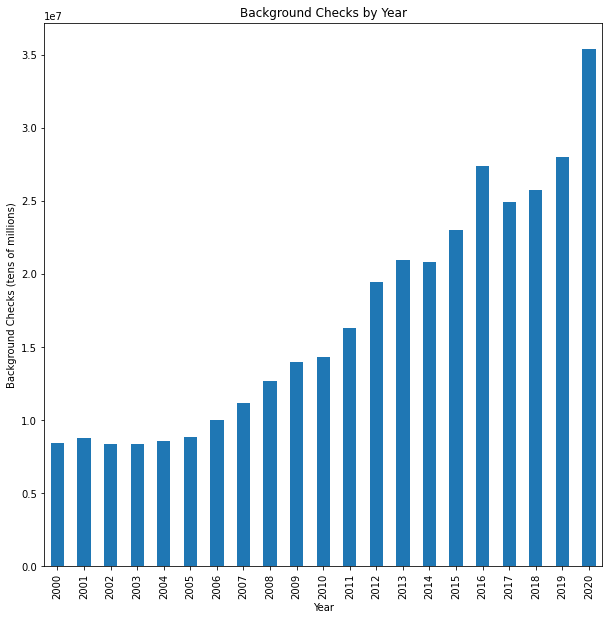

In [426]:
fig, ax = plt.subplots()
plt.xlabel('Year')
plt.ylabel('Firearm Background Checks')
plt.title('Background Checks by Year')
ax.plot(df1.index, df1['Yearly Sum'])
ax.ticklabel_format(style='plain')
df1.plot(kind='bar', title = 'Background Checks by Year', xlabel = 'Year', ylabel = "Background Checks (tens of millions)", legend=None)
plt.show()


In [427]:
#Percentage Increase from Previous Year
for i in range(2001,2020):
    df1['Pct Change'] = df1['Yearly Sum'].pct_change()*100

df1

,Yearly Sum,Pct Change
Year,,
2000,8427096,NaN
2001,8820045,4.662923
2002,8367069,-5.135756
2003,8402244,0.420398
2004,8579891,2.114280
2005,8867055,3.346942
2006,9993057,12.698715
2007,11162272,11.700273
2008,12692985,13.713275


In [428]:
#looking at population change in 18-24 - 2020 population number not finalized - used an approximation of 7% growth.
popover18 = [209786222, 212297780, 214688736, 217007175, 219507563, 221992930, 224622198, 227211802, 229989364, 232637362, 
             235201000, 237649350, 240134326, 242425013, 244737285, 247017112, 249291898, 251400193, 253368356, 255200373, 273064399]
df1['popover18'] = popover18
df1

,Yearly Sum,Pct Change,popover18
Year,,,
2000,8427096,NaN,209786222
2001,8820045,4.662923,212297780
2002,8367069,-5.135756,214688736
2003,8402244,0.420398,217007175
2004,8579891,2.114280,219507563
2005,8867055,3.346942,221992930
2006,9993057,12.698715,224622198
2007,11162272,11.700273,227211802
2008,12692985,13.713275,229989364


In [429]:
df1['Pct Change Pop'] = df1['popover18'].pct_change()*100
df1

,Yearly Sum,Pct Change,popover18,Pct Change Pop
Year,,,,
2000,8427096,NaN,209786222,NaN
2001,8820045,4.662923,212297780,1.197199
2002,8367069,-5.135756,214688736,1.126228
2003,8402244,0.420398,217007175,1.079907
2004,8579891,2.114280,219507563,1.152214
2005,8867055,3.346942,221992930,1.132247
2006,9993057,12.698715,224622198,1.184393
2007,11162272,11.700273,227211802,1.152871
2008,12692985,13.713275,229989364,1.222455


In [430]:
# Which states had the highest total number of checks
df.sort_values(by=['Totals'], ascending=[False]).head(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
State/Territory,,,,,,,,,,,,,,
Illinois,2020,612411,620067,645109,632564,661470,706404,714424,587224,421030,473595,550784,829983,6625082
Illinois,2019,331325,190886,376018,405464,381771,373166,439458,491715,483162,478329,450084,548192,4949570
Kentucky,2018,402376,417418,421247,409485,395487,411606,393583,411800,409385,413568,422343,404143,4912441
Kentucky,2017,345924,313748,397959,392685,391740,392002,390494,394718,398706,401155,404508,417841,4641480
Kentucky,2019,308573,328572,379268,381411,332076,369622,319270,315348,286064,303650,391747,405291,4120892
Kentucky,2016,302383,266913,321318,306214,321666,360293,363085,29746,298753,378973,330444,397059,3676847
Kentucky,2015,320778,198493,281518,253890,271614,242027,220018,286463,262693,276162,295891,308824,3218371
Kentucky,2020,367301,398247,235305,205536,394969,395188,292534,39157,36139,181425,377139,407522,2922940
Illinois,2018,170007,185288,271714,238774,233963,225006,198971,242864,228695,237224,296910,302031,2831447


In [431]:
#Which state had the lowest quantity

#remove territories since those are lowest outside of states
bad_index = ['Virgin Islands', 'Mariana Islands', 'District of Columbia', 'Guam', 'Puerto Rico']
df[~df.index.isin(bad_index)].sort_values(by=['Totals'], ascending=[True]).head(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
State/Territory,,,,,,,,,,,,,,
Hawaii,2007,579,449,591,557,517,478,555,537,545,605,564,544,6521
Hawaii,2000,576,511,574,419,452,489,574,651,726,630,539,468,6609
Hawaii,2004,546,496,776,705,546,602,610,639,583,611,572,612,7298
Hawaii,2003,634,584,726,646,564,558,584,598,703,666,547,629,7439
Hawaii,2001,684,587,601,623,620,499,466,658,529,820,664,713,7464
Hawaii,2005,447,511,681,659,574,617,608,643,695,727,706,707,7575
Hawaii,2006,696,750,858,679,653,706,622,632,552,499,464,477,7588
Hawaii,2002,549,586,539,931,868,536,676,652,599,693,554,624,7807
Hawaii,2008,642,563,689,746,565,608,612,615,655,835,989,1050,8569


In [432]:
df2 = pd.read_csv('NICS_Firearm_Checks.csv', index_col='Year')
df2.fillna(0, inplace=True)
df2 = df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','')))

In [433]:
df2=df2.astype(int)
df2

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
State/Territory,,,,,,,,,,,,,,
Alabama,2020,79332,75336,92652,70748,80519,139873,107490,85347,80478,80934,91839,100927,984548
Alaska,2020,4706,5466,9939,8560,8883,9060,10108,9363,7897,7564,8510,8896,90056
Arizona,2020,33224,37100,82771,59986,51098,74055,60330,54095,51287,52521,54444,54547,610911
Arkansas,2020,19126,21445,31651,30575,25917,30792,27647,23980,24043,27177,30770,31618,293123
California,2020,96567,95430,164497,122999,110823,158349,149685,145797,139313,151359,130793,135442,1465612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,2000,13636,15794,17908,13361,11352,11129,11886,13970,16397,17457,21270,24348,188508
Washington,2000,9171,10534,11763,9711,8880,8910,9156,11248,13685,14792,11741,14664,134255
West Virginia,2000,8589,11546,10855,9255,7143,7397,7743,9060,12058,13650,16591,14371,128258


In [434]:
#defining buckets for red/blue/swing states based on 2020 election results
red_states = ['Idaho', 'Utah', 'Montana', 'Wyoming', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 
              'Texas', 'Iowa', 'Missouri', 'Arkansas', 'Louisiana', 'Indiana', 'Kentucky', 'Tennessee', 'Mississippi', 
              'Alabama', 'North Carolina', 'South Carolina', 'West Virginia', 'Alaska', 'New Hampshire']

swing_states = ['Nevada', 'Arizona', 'Minnesota', 'Wisconsin', 'Ohio', 'Florida', 'Georgia', 'Pennsylvania', 'Michigan',
                'Maine']
blue_states = ['Washington', 'Oregon', 'California', 'Hawaii', 'Colorado', 'New Mexico', 'Illinois', 'Virginia', 'New York', 
               'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey', 'Maryland', 'Delaware']

In [435]:
df2_states = df2[~df.index.isin(bad_index)]

def lean(x):
    if x in red_states:
        x = 1
    elif x in blue_states:
        x = 2
    elif x in swing_states:
        x = 3
    return x
    
df2_states
df2_states.reset_index(inplace=True)
df2_states
df2_states['Political'] =df2_states['State/Territory'].apply(lean)

df2_states[['State/Territory','Totals', 'Political']]

<ipython-input-435-1be6a8bf1fc1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_states['Political'] =df2_states['State/Territory'].apply(lean)


,State/Territory,Totals,Political
0,Alabama,984548,1
1,Alaska,90056,1
2,Arizona,610911,3
3,Arkansas,293123,1
4,California,1465612,2
...,...,...,...
1045,Virginia,188508,2
1046,Washington,134255,2
1047,West Virginia,128258,1
1048,Wisconsin,180492,3


In [436]:
pltc_grp = df2_states.groupby(['Year', 'Political'])
pltc_states = pltc_grp['Totals'].sum()
df3 = pd.DataFrame(pltc_states)
df3.sort_values(by='Year', ascending=False)
print(df3)

plot_df3 = df3.unstack('Political').loc[:, 'Totals']

plot_df3.index = plot_df3.index.tolist()

                  Totals
Year Political          
2000 1           3564874
     2           2573410
     3           2283202
2001 1           3636358
     2           2759835
...                  ...
2019 2           9394171
     3           5563095
2020 1          14798737
     2          12346294
     3           8233653

[63 rows x 1 columns]


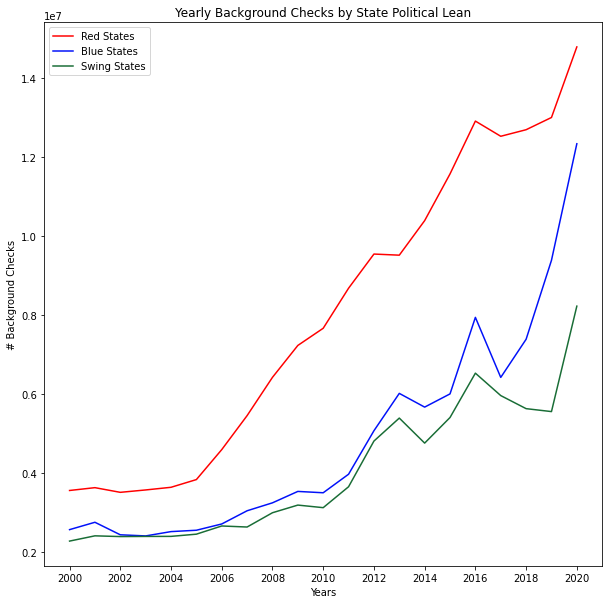

In [437]:
import matplotlib.ticker
plt.rcParams['figure.figsize'] = [10, 10]
df4 = pd.DataFrame(plot_df3)
red = [i for i in df4[1]]
blue = [i for i in df4[2]]
swing = [i for i in df4[3]]
index = [int(i) for i in plot_df3.index]

plt.plot(index, red, color='r', label = 'Red States')
plt.plot(index, blue, color='#0111f9', label = 'Blue States')
plt.plot(index, swing, color='#196D36', label = 'Swing States')

locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Years')
plt.ylabel('# Background Checks')
plt.title('Yearly Background Checks by State Political Lean')
plt.legend()
plt.show()


In [438]:
#normalize state totals by population
df_pop = pd.read_csv('state_pop_data_2010_to_2019.csv')
filter1 = ['District of Columbia', 'Puerto Rico']
df_pop[~df_pop['NAME'].isin(filter1)]

,NAME,CENSUS2010POP,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,Alabama,4779736,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Alaska,710231,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,Arizona,6392017,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,Arkansas,2915918,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,California,37253956,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
5,Colorado,5029196,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736
6,Connecticut,3574097,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
7,Delaware,897934,907381,915179,923576,932487,941252,948921,956823,965479,973764
9,Florida,18801310,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737
10,Georgia,9687653,9802431,9901430,9972479,10067278,10178447,10301890,10410330,10511131,10617423


In [439]:
bad_index = ['Virgin Islands', 'Mariana Islands', 'District of Columbia', 'Guam', 'Puerto Rico']
df[~df.index.isin(bad_index)]
df.reset_index(inplace=True)
df_statetotals = df[['State/Territory', 'Year','Totals']].copy()
df_statetotals.set_index('State/Territory', inplace=True)

In [440]:
df_statetotals

,Year,Totals
State/Territory,,
Alabama,2020,984548
Alaska,2020,90056
Arizona,2020,610911
Arkansas,2020,293123
California,2020,1465612
...,...,...
Virginia,2000,188508
Washington,2000,134255
West Virginia,2000,128258


In [441]:
#2019 Totals
df_statetotals.groupby(['Year']).get_group(2019)

,Year,Totals
State/Territory,,
Alabama,2019,690084
Alaska,2019,76923
Arizona,2019,372912
Arkansas,2019,221344
California,2019,1240632
Colorado,2019,469535
Connecticut,2019,172935
Delaware,2019,46427
District of Columbia,2019,5926


In [442]:
cleaned = pd.DataFrame(df_pop[~df_pop['NAME'].isin(filter1)])
state_normalized = pd.DataFrame(cleaned['NAME'])
state_normalized.set_index('NAME', inplace=True)

In [443]:
#2010:
years=[2010]
for i in years:
    state_normalized[str(i) + ' Checks'] = (df_statetotals.groupby(['Year']).get_group(i))['Totals']
    state_normalized[str(i) + ' Pop'] = cleaned.set_index('NAME')['CENSUS'+str(i)+'POP']
    state_normalized[str(i) + ' Normalized'] = state_normalized[str(i) + ' Checks']/state_normalized[str(i) + ' Pop']
#2011-2019:
years=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for i in years:
    state_normalized[str(i) + ' Checks'] = (df_statetotals.groupby(['Year']).get_group(i))['Totals']
    state_normalized[str(i) + ' Pop'] = cleaned.set_index('NAME')['POPESTIMATE'+str(i)]
    state_normalized[str(i) + ' Normalized'] = state_normalized[str(i) + ' Checks']/state_normalized[str(i) + ' Pop']

state_normalized

,2010 Checks,2010 Pop,2010 Normalized,2011 Checks,2011 Pop,2011 Normalized,2012 Checks,2012 Pop,2012 Normalized,2013 Checks,...,2016 Normalized,2017 Checks,2017 Pop,2017 Normalized,2018 Checks,2018 Pop,2018 Normalized,2019 Checks,2019 Pop,2019 Normalized
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,308607,4779736,0.064566,336102,4799069,0.070035,431356,4815588,0.089575,563880,...,0.126852,477345,4874486,0.097927,474294,4887681,0.097039,690084,4903185,0.140742
Alaska,65909,710231,0.092799,70198,722128,0.097210,85342,730443,0.116836,93405,...,0.118209,80839,739700,0.109286,78761,735139,0.107138,76923,731545,0.105151
Arizona,206050,6392017,0.032236,251477,6472643,0.038852,339663,6554978,0.051818,363036,...,0.059973,384930,7044008,0.054646,377838,7158024,0.052785,372912,7278717,0.051233
Arkansas,191448,2915918,0.065656,206228,2940667,0.070130,246193,2952164,0.083394,279736,...,0.088970,237629,3001345,0.079174,248439,3009733,0.082545,221344,3017804,0.073346
California,816399,37253956,0.021914,905701,37638369,0.024063,1132603,37948800,0.029846,1368295,...,0.060693,1570110,39358497,0.039893,1297132,39461588,0.032871,1240632,39512223,0.031399
Colorado,300820,5029196,0.059815,336296,5121108,0.065669,414838,5192647,0.079890,514658,...,0.097580,496995,5611885,0.088561,524770,5691287,0.092206,469535,5758736,0.081534
Connecticut,179595,3574097,0.050249,186068,3588283,0.051854,237496,3594547,0.066071,294338,...,0.088787,181779,3573297,0.050872,177690,3571520,0.049752,172935,3565287,0.048505
Delaware,19240,897934,0.021427,22490,907381,0.024786,30724,915179,0.033572,40062,...,0.062629,50639,956823,0.052924,47723,965479,0.049429,46427,973764,0.047678
Florida,559347,18801310,0.029750,643229,19053237,0.033760,834319,19297822,0.043234,1073859,...,0.069631,1276549,20963613,0.060894,1203145,21244317,0.056634,1195539,21477737,0.055664


In [444]:
#Normalized background checks by state population
maxValue = state_normalized.idxmax()
print(maxValue)

2010 Checks          Kentucky
2010 Pop           California
2010 Normalized      Kentucky
2011 Checks          Kentucky
2011 Pop           California
2011 Normalized      Kentucky
2012 Checks          Kentucky
2012 Pop           California
2012 Normalized      Kentucky
2013 Checks             Texas
2013 Pop           California
2013 Normalized      Kentucky
2014 Checks          Kentucky
2014 Pop           California
2014 Normalized      Kentucky
2015 Checks          Kentucky
2015 Pop           California
2015 Normalized      Kentucky
2016 Checks          Kentucky
2016 Pop           California
2016 Normalized      Kentucky
2017 Checks          Kentucky
2017 Pop           California
2017 Normalized      Kentucky
2018 Checks          Kentucky
2018 Pop           California
2018 Normalized      Kentucky
2019 Checks          Illinois
2019 Pop           California
2019 Normalized      Kentucky
dtype: object


In [445]:
#Actual values for Kentucky's ratio
state_normalized.loc['Kentucky', ['2010 Normalized', '2011 Normalized', '2012 Normalized',
                                '2013 Normalized', '2014 Normalized', '2015 Normalized', '2016 Normalized',
                                  '2017 Normalized', '2018 Normalized', '2019 Normalized']]

2010 Normalized    0.549753
2011 Normalized    0.521951
2012 Normalized    0.590322
2013 Normalized    0.358332
2014 Normalized    0.564564
2015 Normalized    0.727155
2016 Normalized    0.828458
2017 Normalized    1.042498
2018 Normalized    1.101159
2019 Normalized    0.922380
Name: Kentucky, dtype: float64